In [68]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

In [17]:
def generate_maintenance_matrix(n_states, max_allowed_state, repair_state):
    # state indexes start at 1!
    mat = np.tile(0, (n_states, n_states))
    for i in range(max_allowed_state):
        mat[i][i] = 1
    for i in range(max_allowed_state, n_states):
        mat[i][repair_state - 1] = 1
    return mat

In [23]:
state_count = 5
policy_1 = generate_maintenance_matrix(state_count, 3, 2)
policy_1

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [268]:
def generic_cost_function(n, initial_state_vector, transition_matrix, maintenance_matrix, quantile_vector, horizon, cm_cost, pm_cost):
    cycle_count = math.floor(horizon / n)
    cm_count = 0
    for i in range(1, horizon+1):
        if i % n == 0:
            initial_state_vector = initial_state_vector @ maintenance_matrix
        else:
            initial_state_vector = initial_state_vector @ transition_matrix
            
        #print(i, initial_state_vector, np.sum(initial_state_vector))
        cm_count += initial_state_vector @ quantile_vector

    #chain_state = initial_state_vector @ np.linalg.matrix_power(transition_matrix, horizon - cycle_count) @ np.linalg.matrix_power(maintenance_matrix, cycle_count)
    #print(n, cycle_count,  chain_state)
    #cm_count = chain_state @ quantile_vector
    #print(n, cm_count)
    return cm_count * cm_cost + cycle_count * pm_cost

In [319]:
def minimize_failure_prob(n, initial_state_vector, transition_matrix, maintenance_matrix, horizon, threshold):
    probs = []
    for i in range(1, horizon+1):
        if i % n == 0:
            initial_state_vector = initial_state_vector @ maintenance_matrix
        else:
            initial_state_vector = initial_state_vector @ transition_matrix
        
        #print(i, initial_state_vector, np.sum(initial_state_vector[3:]))
        probs.append(np.sum(initial_state_vector[threshold:]))
        
    return np.max(np.array(probs))

In [320]:
bounds = [
    (0, None)
]
state_vector = np.array([1,0,0,0,0], np.float64)
quantile_vector = np.array([3.27, 15.62, 31, 49, 80], np.float64)
transition_matrix = np.array([
    [0.808896211,0.146622735,0.032948929,0.01153213,0.00000000],
    [0.151815182, 0.595709571, 0.209570957, 0.04290429, 0.00000000],
    [0.013536379, 0.203045685, 0.585448393, 0.18104907, 0.01692047],
    [0.001663894, 0.036605657, 0.166389351, 0.61397671, 0.18136439],
    [0.000000000, 0.001769912, 0.005309735, 0.13805310, 0.85486726]    
], np.float64)
cm_cost = 1.0
pm_cost = 15.0
horizon = 120

1 2192.3999999999996
2 2770.0189082710604
3 2649.071533668908
4 2652.12372413329
5 2700.3458800262697
6 2767.17227573658
7 2835.385475662654
8 2918.147433019755
9 2978.8726516809247
10 3068.550780384134
11 3136.0480904172446
12 3208.6254513678527


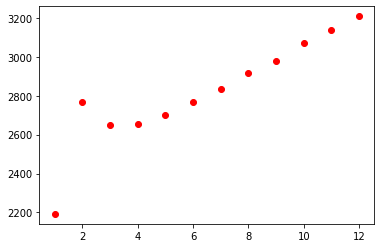

In [324]:
ax = plt.gca()
for x in range(1, 13):
    cost = generic_cost_function(x, state_vector.copy(), transition_matrix.copy(), policy_1.copy(), quantile_vector.copy(), horizon, cm_cost, pm_cost)
    #cost = minimize_failure_prob(x, state_vector.copy(), transition_matrix.copy(), policy_1.copy(), horizon, 3)
    #print(x, cost, cost / horizon)
    ax.plot(x, cost, "ro")
    print(x, cost)

In [309]:
np.array([1,2,3,4,5])[3:]

array([4, 5])